<a href="https://colab.research.google.com/github/Dobarri/DL_CV_study/blob/main/%08w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#회귀(regression)

regression은 머신러닝에서 가장 기초적인 데이터 분석 방법 중 하나이다. 
가격이나 확률처럼 연속된 실수값을 정확히 예측하는 것이 목표입니다.

앞에서 만들어본 AND, OR, XOR 신경망도 회귀의 일종이에요.

##4.1 선형회귀

선형회귀(linear regression)은 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것이에요.

국어성적과 수학성적, 키와 몸무게 등 2개의 데이터에 대한 경향성을 예측할 수 있어요. 


우선 2018년 우리나라의 지역별 인구증가율과 고령인구비율 사이에 어떤 경향성이 있는 지 파악해봅시다.

먼저 데이터를 시각화해서 볼께요.

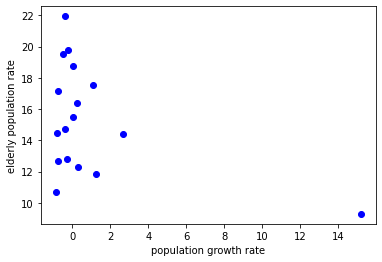

In [1]:
#2018년 지역별 인구증과율과 고령인구비율 데이터

import matplotlib.pyplot as plt

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(population_inc, population_old,'bo')
plt.xlabel('population growth rate')
plt.ylabel('elderly population rate')
plt.show()

오른쪽 아래 혼자 치우쳐있는 점이 있네요. 데이터를 보니 세종시의 인구증가율안 15.17값이네요. 

이것을 Outlier라고하며 일반적인 경향에서 벗어나기때문에 제거하는 것이 좋습니다. 

outlier를 제거하고 다시 그래프를 그려보죠.

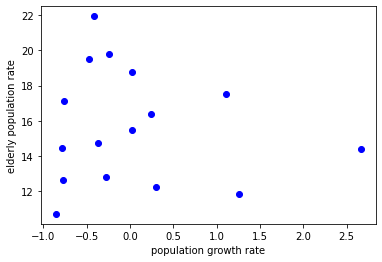

In [2]:
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]

plt.plot(population_inc, population_old,'bo')
plt.xlabel('population growth rate')
plt.ylabel('elderly population rate')
plt.show()

우측하단에 혼자 치우쳐있는 값처럼 보이지만 x축 scale이 변경되어서 위의 그래프보다 차이가 덜 나는 것을 알 수 있습니다.

이제 위의 데이터를 이용해서 선형 회귀를 해봅시다.

- residue : 직선과 데이터의 차이
- Least Square Method : 최소제곱법(residue의 제곱을 최소화하는 알고리즘)

최소제곱법을 이용해서 y=ax+b에서 a(기울기)와 b(y절편)을 구할 수 있어요.

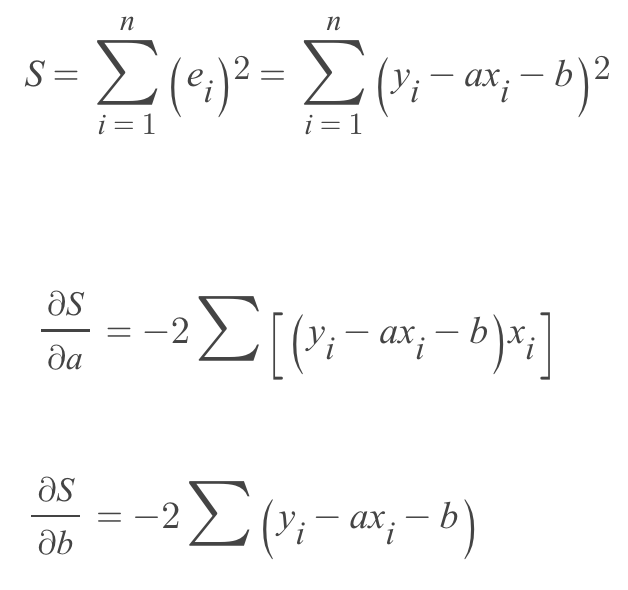

a,b에 대해 편미분을 적용해서 0이되는 지점을 찾아볼께요.



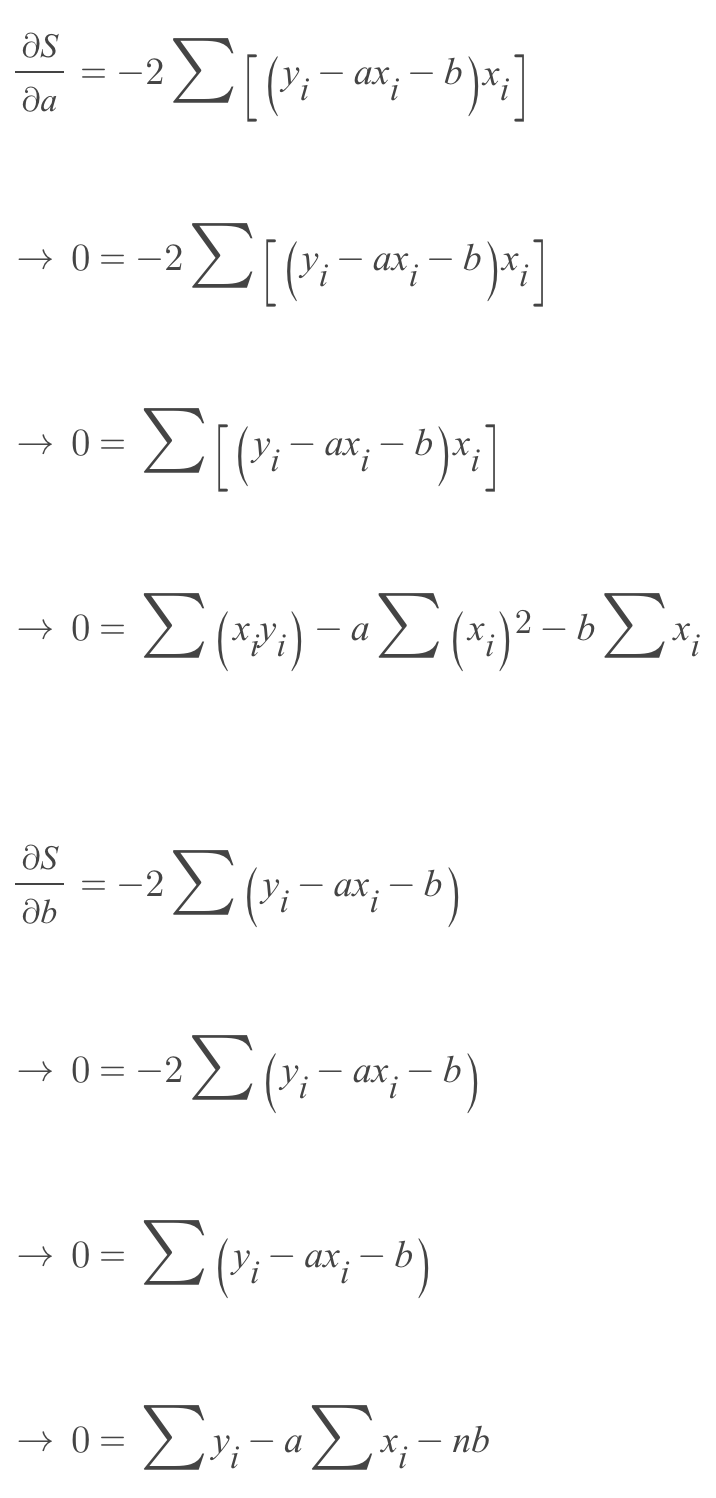

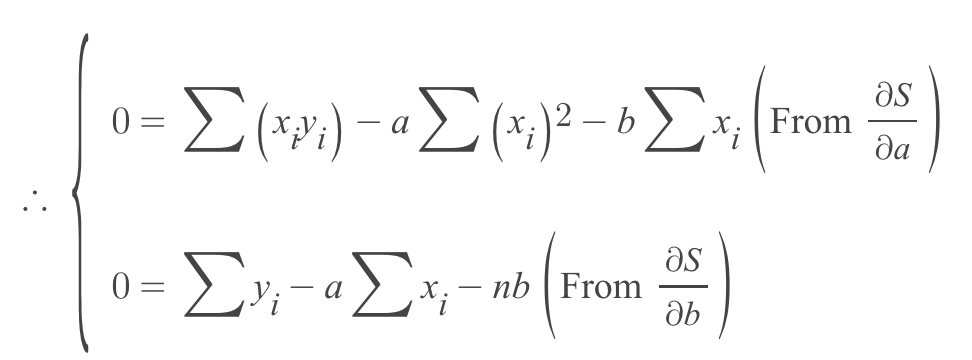

그럼 이렇게 2개의 식을 구할 수 있습니다.

이제 연립해서 a,b에 대한 식을 얻어봅시다. 

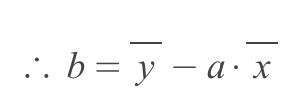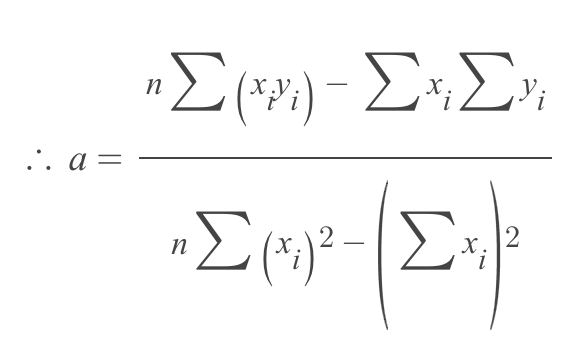

그럼 이렇게 a,b를 구할 수 있어요. 자세한 내용은 블로그 글을 참고해보세요.
https://blog.naver.com/whdqja0020/222722240645

그래서 이제 최소제곱법을 이용해 오차를 적게하는 직선을 구해볼께요.


a: -0.355834147915461 b: 15.669317743971302


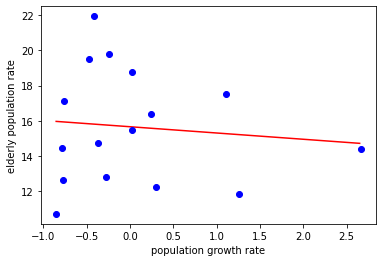

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#평균
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)

#최소제곱해
a = sum([(elem_y-y_mean)*(elem_x-x_mean) for elem_y,elem_x in list(zip(y,x))])
a /= sum([(elem-x_mean)**2 for elem in x])
b = y_mean - a*x_mean
print('a:',a,'b:',b)

line_x = np.arange(min(x), max(x), 0.01)
line_y = a*line_x + b

#회귀선
plt.plot(line_x,line_y,'r-')

#데이터 
plt.plot(x,y,'bo')
plt.xlabel('population growth rate')
plt.ylabel('elderly population rate')
plt.show()

- zip : 두 개 이상의 리스트를 하나로 묶음
- arrange(start,end,step) : start부터 end-1까지 step 간격 수를 ndarray로 반환

그래프를 보면 빨간색 직선이 최소제곱법으로 구한 기울기와 절편을 그린 직선이에요.
x값이 증가할수록 y값이 감소하는 경향을 보이네요. 인구증가율이 증가하면 고령인구비율이 감소한다는 의미에요. 

이처럼 하나가 증기할 때 다른 하나는 감소하는 관계를 **음의 상관관계**라고 합니다.

하지만 앞에서 수식을 직접 쓰지 않고 tensorflow를 사용하면 회귀선을 구할 수 있습니다.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: 0.12068509 b: 6.690712 loss: 90.20917
199 a: -0.11748483 b: 11.182268 loss: 29.867714
299 a: -0.2565117 b: 13.799416 loss: 13.269226
399 a: -0.32180497 b: 15.028657 loss: 10.190298
499 a: -0.34629586 b: 15.489747 loss: 9.812975
599 a: -0.35365605 b: 15.628317 loss: 9.782481
699 a: -0.3554324 b: 15.661751 loss: 9.780861
799 a: -0.35577485 b: 15.6682005 loss: 9.780804
899 a: -0.3558273 b: 15.669188 loss: 9.780803
999 a: -0.35583323 b: 15.669302 loss: 9.780804


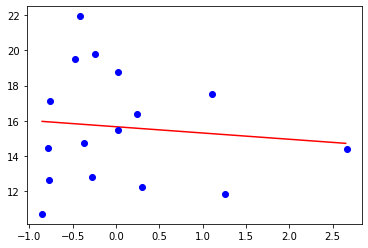

In [4]:
import tensorflow as tf
import random

#a,b random값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

#residue의 제곱의 평균(mean squared error) 반환하는 함수
def compute_loss() :
    y_pred = a*x + b
    loss = tf.reduce_mean((y-y_pred)**2)
    return loss

#Adam optimizer 사용
optimizer = tf.optimizers.Adam(lr=0.07)

#loss를 minimize
for i in range(1000) :
    optimizer.minimize(compute_loss, var_list=[a,b])
    if i%100 == 99 :
        print(i, 'a:',a.numpy(), 'b:',b.numpy(),'loss:',compute_loss().numpy())

line_x = np.arange(min(x),max(x),0.01)
line_y = a*line_x + b

#grapt
plt.plot(line_x, line_y, 'r-')
plt.plot(x,y,'bo')
plt.show()

- optimizer는 Adam(Adaptive Moment Estimation)을 사용했어요. (RMSprop+momentum)

스텝사이즈와 방향성을 모두 고려하여 기울기 값과 기울기의 제곱값의 지수이동평균을 활용하여 STep변화량을 조절하는 optimizer입니다.

- optimizer.minimize()함수는 최소화할 손실, 학습시킬 변수 리스트를 전달해서 loss를 minimize하도록 학습시킵니다.

optimizer들을 간단히 설명해놓은 사진이 있어서 첨부해봅니다!


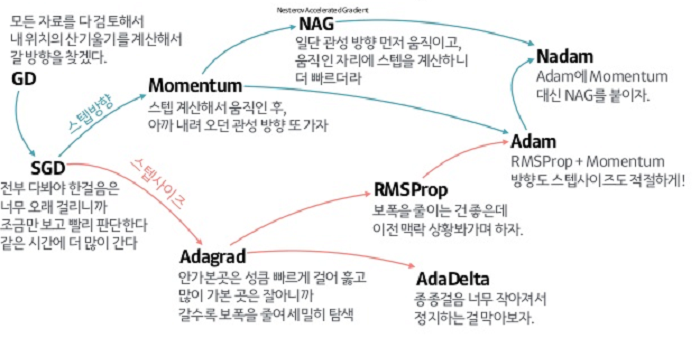

loss를 확인해보면 9.78정도에서 머무는 것을 확인할 수 있습니다. 그래프를 보면 위에서와 유사하게 나왔네요. a,b도 유사하게 나왔다는 뜻이겠네요. 

그런데 이 회귀선이 데이터들의 경향성을 잘 반영하고 있는걸까요?

다른 방법을 사용해서 파악해봅시다.

#다항 회귀(Nonlinear Regression)

- 비선형회귀(nonlinear regression) : 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀입니다.
- 다항회귀(polynomial regression) : 비선형회귀 중 x^2, x^3등 다항식을 이용한 회귀입니다. 회귀선이 직선 대신 곡선으로 나타납니다.

그래서 위의 데이터를 이용해 2차 함수 형태의 회귀선으로 구해보겠습니다.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: 3.9220326 b: -5.6315107 c 6.5346255 loss: 67.73587
199 a: 2.7589383 b: -4.572407 c 10.37038 loss: 31.009186
299 a: 1.2571414 b: -2.303077 c 12.984825 loss: 15.844722
399 a: 0.30633286 b: -0.8521076 c 14.608438 loss: 10.918959
499 a: -0.19848467 b: -0.08212562 c 15.472122 loss: 9.714738
599 a: -0.4294933 b: 0.2701904 c 15.867498 loss: 9.4913435
699 a: -0.5209437 b: 0.40966135 c 16.024027 loss: 9.459793
799 a: -0.55230844 b: 0.45749626 c 16.07771 loss: 9.456404
899 a: -0.5616153 b: 0.47169015 c 16.09364 loss: 9.456129
999 a: -0.56399584 b: 0.47532108 c 16.097713 loss: 9.456112


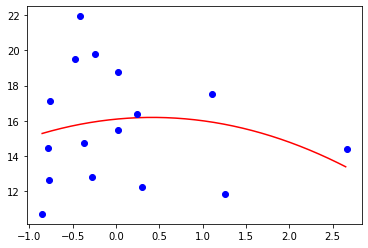

In [5]:
import tensorflow as tf
import random

x = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a,b random값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

#residue의 제곱의 평균(mean squared error) 반환하는 함수
def compute_loss() :
    y_pred = a*x*x + b*x + c
    loss = tf.reduce_mean((y-y_pred)**2)
    return loss

#Adam optimizer 사용
optimizer = tf.optimizers.Adam(lr=0.07)

#loss를 minimize
for i in range(1000) :
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    if i%100 == 99 :
        print(i, 'a:',a.numpy(), 'b:',b.numpy(),'c',c.numpy(), 'loss:',compute_loss().numpy())

line_x = np.arange(min(x),max(x),0.01)
line_y = a*line_x*line_x + b*line_x + c

#grapt
plt.plot(line_x, line_y, 'r-')
plt.plot(x,y,'bo')
plt.show()

위의 코드에서 조금만 바꿔주면 됩니다.

우선 변수c를 추가해줄께요. 그리고 loss를 구할 때 2차함수 형태로 y_pred를 구해줍니ㅏㄷ. minimize할 때도 c를 같이 넣어주어야하고요.
출력할 line_y도 c값을 더한 2차함수 형태로 점을 계산해줍니다.

출력된 Loss를 보면 선형회귀모델보다 줄어든 것을 확인할 수 있네요. 
그래프를 봐도 회귀선이 경향성을 더 잘 나타낸 것 같네요!


이번엔 3차함수형태로 바꿔서 구해봅시다.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: -1.2068962 b: 5.9105444 c: -3.8405793 d: 6.704519 loss: 59.14945
199 a: -1.9384768 b: 6.624512 c: -2.1775126 d: 10.195547 loss: 29.215717
299 a: -1.5823954 b: 4.8355484 c: -0.8786195 d: 12.313288 loss: 19.16386
399 a: -0.83953166 b: 2.5172708 c: -0.53211987 d: 13.788565 loss: 13.658552
499 a: -0.1412945 b: 0.48052937 c: -0.44854262 d: 14.89009 loss: 10.59412
599 a: 0.39822572 b: -1.0742791 c: -0.41582438 d: 15.701925 loss: 9.070895
699 a: 0.77889776 b: -2.169076 c: -0.39641201 d: 16.2698 loss: 8.398609
799 a: 1.0298407 b: -2.8904948 c: -0.38406175 d: 16.643465 loss: 8.134655
899 a: 1.1851162 b: -3.3368406 c: -0.37648994 d: 16.874561 loss: 8.042431
999 a: 1.2753863 b: -3.5963147 c: -0.37210295 d: 17.008884 loss: 8.013784


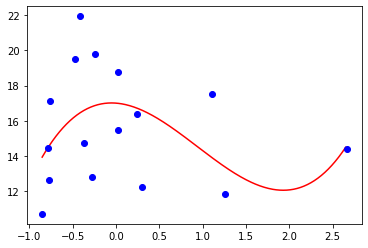

In [6]:
import tensorflow as tf
import random

x = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

#a,b random값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

#residue의 제곱의 평균(mean squared error) 반환하는 함수
def compute_loss() :
    y_pred = a*x*x*x + b*x*x + c*x + d
    loss = tf.reduce_mean((y-y_pred)**2)
    return loss

#Adam optimizer 사용
optimizer = tf.optimizers.Adam(lr=0.07)

#loss를 minimize
for i in range(1000) :
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    if i%100 == 99 :
        print(i, 'a:',a.numpy(), 'b:',b.numpy(),'c:',c.numpy(), 'd:',d.numpy() , 'loss:',compute_loss().numpy())

line_x = np.arange(min(x),max(x),0.01)
line_y = a*line_x*line_x*line_x + b*line_x*line_x + c*line_x + d

#grapt
plt.plot(line_x, line_y, 'r-')
plt.plot(x,y,'bo')
plt.show()

3차함수를 사용했더니 loss가 더 줄어들었네요! 
데이터의 경향성이 더 잘 반영된 거 같기도 합니다...

이렇게 다양한 함수들을 적용해보면서 어느 것이 적절한 회귀식인지 찾기위해 계속 시도해봐야합니다.


하지만 Tensorflow에서는 지금까지 한 선형회귀, 다항회귀, 비선형회귀말고 **딥러닝 네트워크**를 활용한 회귀를 시도할 수 있습니다.

In [7]:
x = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


layer가 2개인 모델을 구성했습니다. 첫 번째 Layer에서 activation function을 tanh함수를 사용했어요. tanh함수는 하이퍼볼릭 탄젠트함수로 -1~1사이 값을 반환합니다.

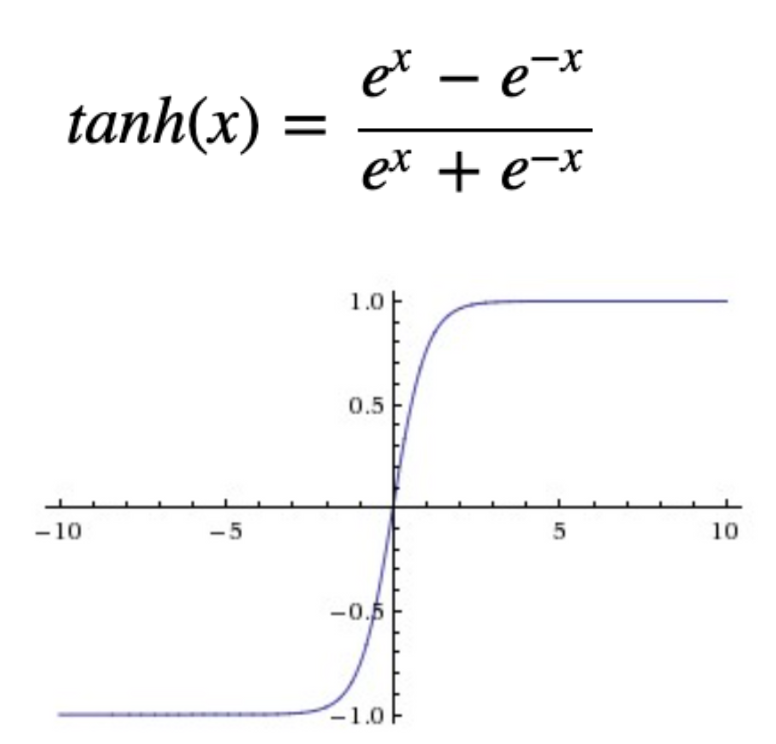

여기서 이상한 점 못느끼셨나요...?
마지막 layer에 왜 activation function이 없을까요?

사실 마지막 레이어에서는 특별한 출력 조건이 없다면 Activation function을 추가하는 것이 큰 의미를 가지지 않습니다.

첫 번쨰 레이어의 뉴런은 6개를 했습니다. 뉴런 수가 너무 많으면 Overfitting될 수 있기 때문에 적당한 수로 설정했습니다. 

중요한 점은 두 번쨰 레이어에서의 뉴런 갯수입니다. 우리는 입력x값에 대해 하나의 y값을 얻어야하기 때문에 units을 1개로 설정했습니다.
optimizaer는 'SGD'를 선택했고 Loss는 'mse를' 선택했습니다.

이제 fit으로 학습해봅시다.

In [8]:
model.fit(x,y,epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 529ms/step - loss: 254.3319
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 130.2615
Epoch 3/15
1/1 [==============================] - 0s 11ms/step - loss: 18.4980
Epoch 4/15
1/1 [==============================] - 0s 14ms/step - loss: 9.9533
Epoch 5/15
1/1 [==============================] - 0s 11ms/step - loss: 9.7228
Epoch 6/15
1/1 [==============================] - 0s 13ms/step - loss: 9.6540
Epoch 7/15
1/1 [==============================] - 0s 11ms/step - loss: 9.6236
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 9.6050
Epoch 9/15
1/1 [==============================] - 0s 12ms/step - loss: 9.5896
Epoch 10/15
1/1 [==============================] - 0s 14ms/step - loss: 9.5741
Epoch 11/15
1/1 [==============================] - 0s 11ms/step - loss: 9.5570
Epoch 12/15
1/1 [==============================] - 0s 10ms/step - loss: 9.5376
Epoch 13/15
1/1 [==============================] - 0s 1

model을 15번 반복해서 학습했습니다. loss가 어느정도 줄어 머물면 학습을 중단해야합니다.
너무 많이 학습하게되면 Overfitting이 될 수 있으니까요.

이제 예측값을 확인해봅시다.

In [9]:
model.predict(x)

array([[15.890348 ],
       [15.608183 ],
       [15.39492  ],
       [15.917141 ],
       [15.5083885],
       [15.9011345],
       [15.884132 ],
       [15.803318 ],
       [15.616135 ],
       [15.844767 ],
       [15.5492935],
       [15.829382 ],
       [15.876461 ],
       [15.917028 ],
       [15.623974 ],
       [13.910833 ]], dtype=float32)

15부근의 값을 나타내고 있습니다.

그래프를 그려서 시각적으로 다시 확인해봅시다. 

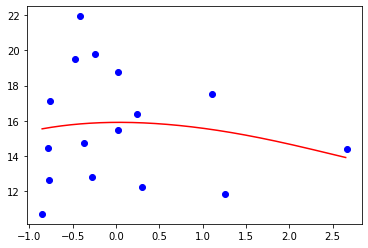

In [10]:
line_x = np.arange(min(x),max(x),0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(x,y,'bo')
plt.show()

데이터 경향성을 잘 보여주는 회귀선을 나타내는 것 같습니다.

이렇게 딥러닝 네트워크를 사용하면 직접 parameter를 구하지 않아도 회귀선을 구할 수 있습니다. 

#보스턴 주택 가격 데이터셋

이제 회귀에서 유명한 보스턴 주택 가격 데이터셋을 이용해서 주택 가격 예측 네트워크를 만들어볼께요.

데이터는 1978년 보스턴 지역 주택 가격으로 506개 타운의 주택 가격 중앙값을 1000달러 단위로 나타냅니다.
주어진 데이터는 범죄율, 방 갯수, 고속도로까지 거리 등 13가지 입니다.

데이터를 먼저 불러오겠습니다.

In [11]:
from tensorflow.keras.datasets import boston_housing
(train_x,train_y),(test_x,test_y) = boston_housing.load_data()

print(len(train_x), len(test_x))
print(train_x[0])
print(test_x[0])

65536/57026 [==================================] - 0s 0us/step
404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]


boston housing dataset은 keras.datasets에 탑재되어 있습니다.

train data는 404개, test data는 102개 입니다. 
train data중 20%를 validation data로 사용하겠습니다.
정해진 것은 아니지만 보통 전체 데이터의 20%정도를 검증데이터로 사용합니다.

데이터 속성에 대한 설명을 추가해볼께요.
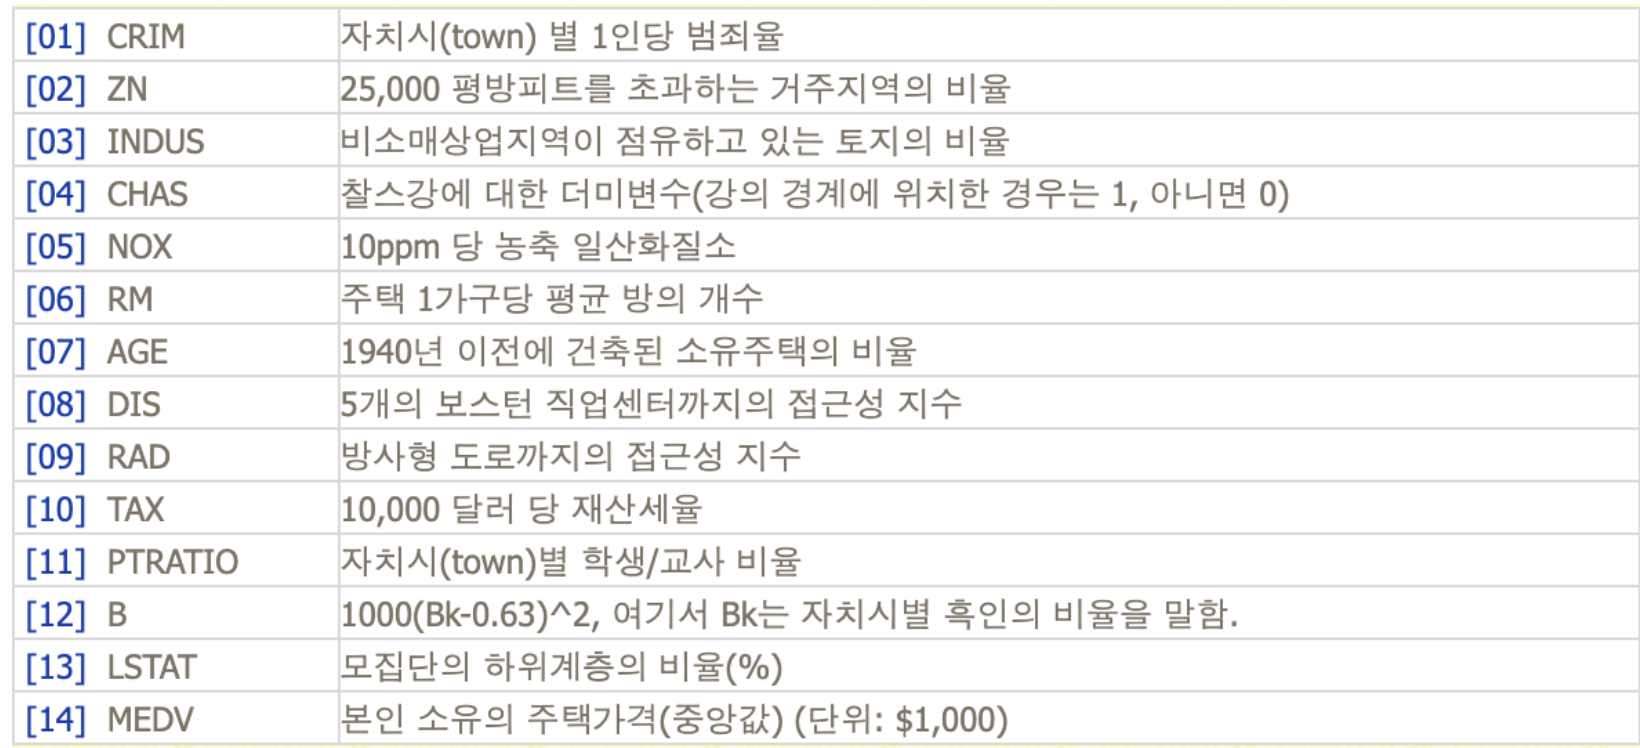



데이터가 정수뿐만 아니라 비율(%), 0,1로 나타나는 데이터 등 형태가 다양하기 때문에 정규화(standardization)을 하는 전처리과정을 거쳐야 할 것 같아요. 그래야 학습효율이 좋아집니다.

정규화할 때는 각 데이터 값에서 평균값을 뺀 다음, 표준편차로 나누어줍니다. 이것이 데이터 분포를 normal distribution으로 옮기는 역할을 합니다.



In [12]:
#data 전처리
x_mean = train_x.mean(axis=0)
x_std = train_x.std(axis=0)
train_x -= x_mean
train_x /= x_std
test_x -= x_mean
test_x /= x_std

y_mean = train_y.mean(axis=0)
y_std = train_y.std(axis=0)
train_y -= y_mean
train_y /= y_std
test_y -= y_mean
test_y /= y_std

print(train_x[0])
print(test_x[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]


axis=0이라는 것은 **행방향**으로 더해서 평균을 계산하겠다는 뜻입니다. axis=1이면 열방향이고요.

std는 표준편차를 계산해주는 함수입니다.

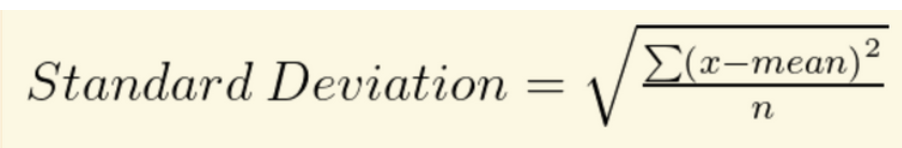

이제 딥러닝 네트워크 모델을 구성해보겠습니다.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 52)                728       
                                                                 
 dense_3 (Dense)             (None, 39)                2067      
                                                                 
 dense_4 (Dense)             (None, 26)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


데이터 수가 전보다 증가했기 때문에 더 복잡한 내용을 학습시키려고 4개의 layer를 사용했고 뉴런 수도 늘렸어요. 

첫 번째 layer에 input_shape=13인 이유는 x 데이터에 13가지 속성값이 있기 때문이고, 마지막 layer에 unit이 1인 이유는 출력 값이 주택가격 1개로 나오기 때문에 1로 설정했습니다.

activation function으로는 'relu'함수를 사용했어요. 여러 개의 layer를 겹쳐서 사용할 때 sigmoid,tanh보다 좋은 성능을 낼 수 있습니다.

이제 fit함수로 학습시켜볼께요.

In [14]:
history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 1s 23ms/step - loss: 0.9949 - val_loss: 0.4739
Epoch 2/25
10/10 [==============================] - 0s 8ms/step - loss: 0.3453 - val_loss: 0.6137
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.3083 - val_loss: 0.4178
Epoch 4/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2732 - val_loss: 0.3480
Epoch 5/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1878 - val_loss: 0.2963
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1501 - val_loss: 0.1753
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1714 - val_loss: 0.2707
Epoch 8/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1206 - val_loss: 0.2077
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1301 - val_loss: 0.1957
Epoch 10/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1254 - val_loss: 0.1944
Epoch 11/25
10/10 

validation 데이터를 25%로 해주었어요. 밑에 epoch가 반복될 때마다 val_loss도 같이 표현되는 것을 볼 수 있네요.

loss의 변화과정을 시각화해볼께요.

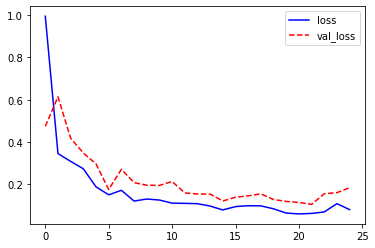

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

legend()는 우측위에 범례를 표시해줍니다. 

시각화해보니 loss가 증가하다가 20epoch이후에 증가하는 모습을 보이네요.. 그 전에 학습을 중단시키는 게 좋아보입니다. 런타임을 초기화하고 epoch를 20까지 하면 더 좋은 성능을 기대할수도 있겠네요. 

이제 test데이터로 성능을 평가해볼께요.

In [16]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 3ms/step - loss: 0.1715


0.1714504063129425

loss가 0.2927이 나오네요! 위에 test data loss(0.2913)와 비슷한 수치입니다. 학습이 잘 된 거 같네요!

이 네트워크가 주택 가격을 어떻게 예측하는 지 실제 주택가격과 예측한 주택가격을 시각화해봅시다.

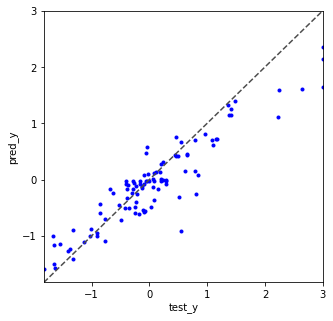

In [17]:
import matplotlib.pyplot as plt

pred_y = model.predict(test_x)

plt.figure(figsize=(5,5))
plt.plot(test_y,pred_y,'b.')
plt.axis([min(test_y),max(test_y),min(test_y),max(test_y)])

#y=x그래프
plt.plot([min(test_y),max(test_y)],[min(test_y),max(test_y)], ls='--', c='.3')
plt.xlabel('test_y')
plt.ylabel('pred_y')
plt.show()

- ls : linestyle
- c : 점선의 투명도

실제 주택 가격과 예측 주택 가격이 같다면 Y=x그래프 위에 점이 있어야하는데 그렇지 않은 비율이 많은 거 같네요..

더 좋은 성능을 내기 위해서 아까 앞에서 본 것처럼 Overfitting이 되지 않기위해 val_loss, loss가 증가하지 않도록 그 전에 학습을 중단시켜보면 될꺼같아요.

학습 도중에 loss가 높아지면 중단하기 위해서 **callback함수**를 사용합니다! callback함수는 epoch가 끝날 때마다 호출됩니다. 

fit함수를 사용할 때 callback parameter에 list로 추가해서 지정해줍니다.

In [18]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 1s 20ms/step - loss: 2.4486 - val_loss: 0.9079
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5131 - val_loss: 0.7117
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.3794 - val_loss: 0.7884
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.3982 - val_loss: 0.3872
Epoch 5/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2798 - val_loss: 0.3876
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2563 - val_loss: 0.2966
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2025 - val_loss: 0.3160
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1963 - val_loss: 0.3068
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1946 - val_loss: 0.2444
Epoch 10/25
10/10 [==============================] - 0s 8ms/step - loss: 0.1891 - val_loss: 0.2130
Epoch 11/25
10/10 [==========

patient는 몇 번의 Epoch를 기준으로 할 것인지를 나타냅니다. 여기서 3으로 설정했다는 것은 3번연속으로 monitoring target인 val_loss가 가장 낮은 값을 갱신하지 못하면 학습을 멈추게 됩니다. 

12번째에서 val_loss가 0.1677였는데 이후에 3번동안 이 값보다 낮은 val_loss가 나오지 않아서 15번째까지 학습하고 멈춘것이에요.

시각화해보죠.

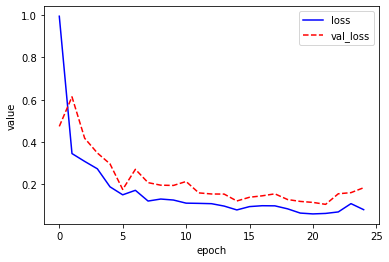

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()

plt.show()

runtime을 초기화하고 실행해야하는데 그럼 앞에 설명한 글에 내용과 값이 달라져서 그냥 진행할께요...

이제 모델을 평가해볼께요!

In [20]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 5ms/step - loss: 0.2969


0.2969070374965668

다시 시각화해보면

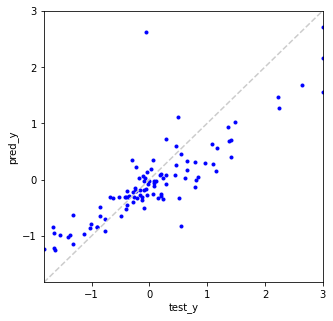

In [21]:
import matplotlib.pyplot as plt

pred_y = model.predict(test_x)

plt.figure(figsize=(5,5))
plt.plot(test_y,pred_y,'b.')
plt.axis([min(test_y),max(test_y),min(test_y),max(test_y)])

#y=x그래프
plt.plot([min(test_y),max(test_y)],[min(test_y),max(test_y)], ls='--', c='.8')
plt.xlabel('test_y')
plt.ylabel('pred_y')
plt.show()

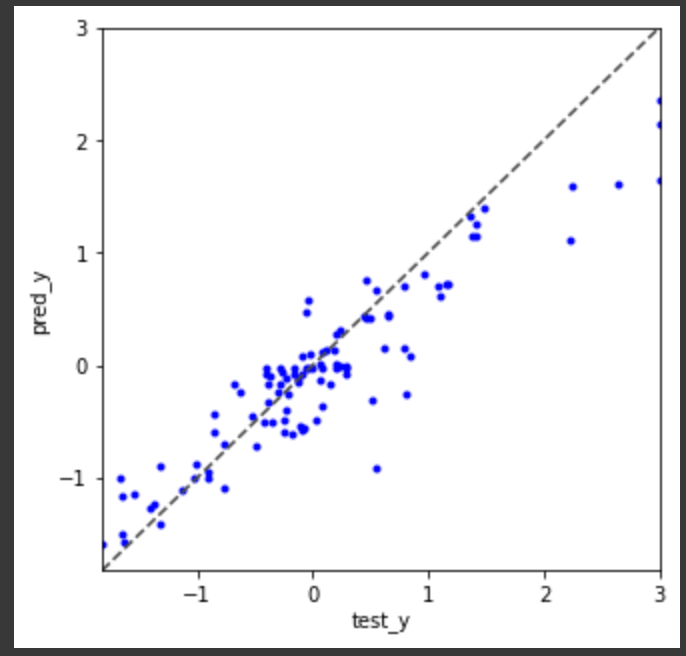

아까 위에서 그려보았던 그래프와 비교해보면 오히려 더 안좋은 결과를 보이는 것 같네요. loss가 늘어나서 그렇게 나타날 꺼라고 예상은 했습니다. runtime을 초기화하고 다시 학습하면 Overfitting을 조금은 줄일 수 있을 것 같네요!!